In [2]:
import torch

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

# Data Preparation

In [2]:
from pathlib import Path

data_path = Path("/Users/firmansyahsundana/Documents/research/computer_science/plant-diseases-classification/Datasets/New Plant Diseases Dataset(Augmented)")

In [3]:
import os

def walk_through_dir(dir_path):
    """
    Walks through dir_path returning its contents.
    Args:
        dir_path (str or pathlib.Path): target directory

    Returns:
        A print out of:
            number of subdirectories in dir_path
            number of images (files) in each subdirectory
            name of each subdirectory
    """
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [6]:
walk_through_dir(data_path)

There are 2 directories and 1 images in '/Users/firmansyahsundana/Documents/research/computer_science/plant-diseases-classification/Datasets/New Plant Diseases Dataset(Augmented)'.
There are 38 directories and 1 images in '/Users/firmansyahsundana/Documents/research/computer_science/plant-diseases-classification/Datasets/New Plant Diseases Dataset(Augmented)/valid'.
There are 0 directories and 456 images in '/Users/firmansyahsundana/Documents/research/computer_science/plant-diseases-classification/Datasets/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy'.
There are 0 directories and 472 images in '/Users/firmansyahsundana/Documents/research/computer_science/plant-diseases-classification/Datasets/New Plant Diseases Dataset(Augmented)/valid/Grape___Black_rot'.
There are 0 directories and 485 images in '/Users/firmansyahsundana/Documents/research/computer_science/plant-diseases-classification/Datasets/New Plant Diseases Dataset(Augmented)/valid/Potato___Early_blight'.
The

In [4]:
# Setup train and testing paths
train_dir = data_path / "train"
test_dir = data_path / "valid"

train_dir, test_dir

(PosixPath('/Users/firmansyahsundana/Documents/research/computer_science/plant-diseases-classification/Datasets/New Plant Diseases Dataset(Augmented)/train'),
 PosixPath('/Users/firmansyahsundana/Documents/research/computer_science/plant-diseases-classification/Datasets/New Plant Diseases Dataset(Augmented)/valid'))

## Visualize an image

In [6]:
import random
from PIL import Image

# Set seed
random.seed(42)
image_path_list = list(data_path.glob("*/*/*.jpg"))
random_image_path = random.choice(image_path_list)
image_class = random_image_path.parent.stem
img = Image.open(random_image_path)
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

TypeError: Image data of dtype object cannot be converted to float

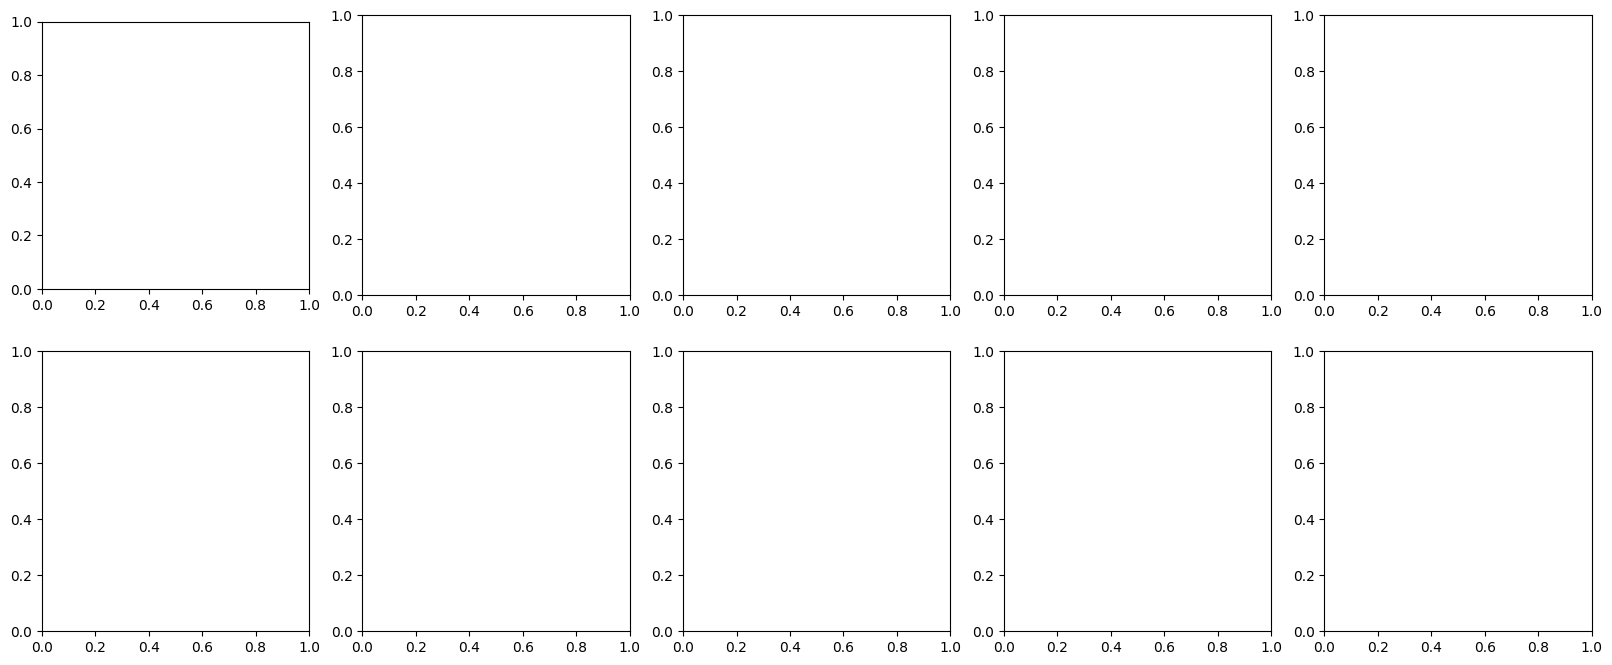

In [12]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()
for i in range(10):
    random_image_path = random.choice(image_path_list)
    img = np.asarray(random_image_path)
    axes[i].imshow(img)  # Plot the image
    axes[i].axis('off')  # Turn off axis labels
    axes[i].set_title(f"Image {i+1}")  # Set title for the subplot
plt.tight_layout()

# Show the plot
plt.show()

(-0.5, 255.5, 255.5, -0.5)

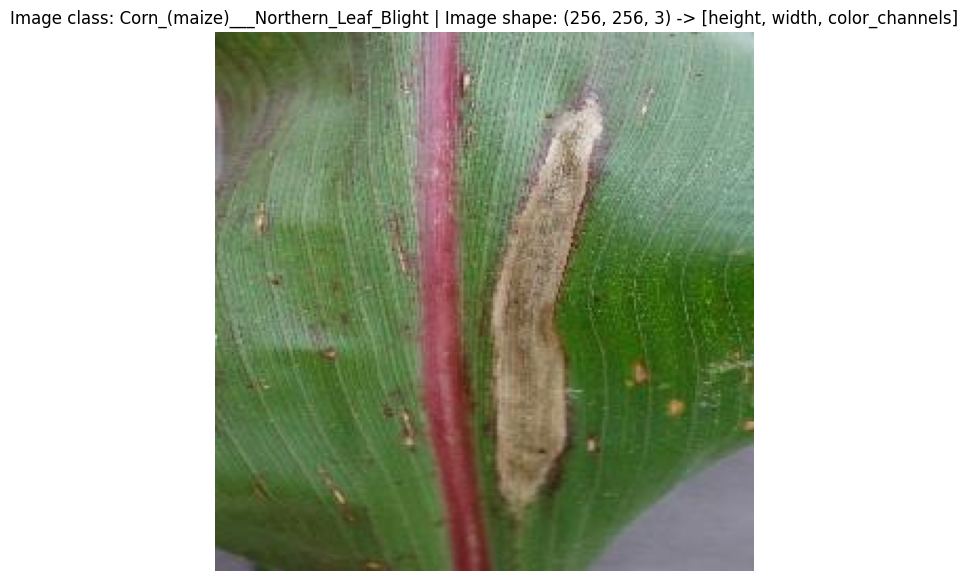

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False)

## Transforming data

In [11]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [12]:
data_transform = transforms.Compose([
    # Resize the images to (height, width)
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor()
])

In [13]:
from torchvision import datasets
train_data = datasets.ImageFolder(
    root=train_dir,
    transform=data_transform,
    target_transform=None
)

test_data = datasets.ImageFolder(
    root=test_dir,
    transform=data_transform
)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 70295
    Root location: /Users/firmansyahsundana/Documents/research/computer_science/plant-diseases-classification/Datasets/New Plant Diseases Dataset(Augmented)/train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 17572
    Root location: /Users/firmansyahsundana/Documents/research/computer_science/plant-diseases-classification/Datasets/New Plant Diseases Dataset(Augmented)/valid
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )


In [15]:
class_names = train_data.classes
print(len(class_names))
class_names

38


['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [50]:
len(train_data), len(test_data)

(70295, 17572)

In [16]:
img,label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.6588, 0.6549, 0.6510,  ..., 0.7294, 0.7216, 0.7098],
         [0.6667, 0.6627, 0.6588,  ..., 0.7333, 0.7294, 0.7216],
         [0.6627, 0.6627, 0.6588,  ..., 0.7373, 0.7333, 0.7294],
         ...,
         [0.3961, 0.4039, 0.4078,  ..., 0.5020, 0.4980, 0.4980],
         [0.3961, 0.4000, 0.4039,  ..., 0.4824, 0.4863, 0.4863],
         [0.4039, 0.4039, 0.4000,  ..., 0.4706, 0.4784, 0.4824]],

        [[0.6431, 0.6392, 0.6353,  ..., 0.7176, 0.7098, 0.6980],
         [0.6510, 0.6471, 0.6431,  ..., 0.7216, 0.7176, 0.7098],
         [0.6471, 0.6471, 0.6431,  ..., 0.7255, 0.7216, 0.7176],
         ...,
         [0.3569, 0.3647, 0.3686,  ..., 0.4392, 0.4353, 0.4353],
         [0.3569, 0.3608, 0.3647,  ..., 0.4196, 0.4235, 0.4235],
         [0.3647, 0.3647, 0.3608,  ..., 0.4078, 0.4157, 0.4196]],

        [[0.7725, 0.7686, 0.7647,  ..., 0.8314, 0.8235, 0.8118],
         [0.7804, 0.7765, 0.7725,  ..., 0.8353, 0.8314, 0.8235],
         [0.7765, 0.7765, 0.7725,  ..., 0.83

## Dataloader

In [17]:
# Turn train dan test Datasets into DataLoaders
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    num_workers=1,
    shuffle=True
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    num_workers=1,
    shuffle=False
)

print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x17f3d4290>, <torch.utils.data.dataloader.DataLoader object at 0x17f3d42f0>)
Length of train dataloader: 2197 batches of 32
Length of test dataloader: 550 batches of 32


In [18]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))

print(f"Image shape: {train_features_batch.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {train_labels_batch.shape}")

Image shape: torch.Size([32, 3, 224, 224]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([32])


# Model 0: Baseline model

In [20]:
import torch.nn as nn

# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")


Shape before flattening: torch.Size([3, 224, 224]) -> [color_channels, height, width]
Shape after flattening: torch.Size([3, 50176]) -> [color_channels, height*width]


In [21]:
class PlantDiseasesModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units:int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [22]:
torch.manual_seed(42)

model_0 = PlantDiseasesModelV0(
    input_shape=(50176*3),
    hidden_units=512,
    output_shape=len(class_names)
)

model_0.to(device)

PlantDiseasesModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=150528, out_features=512, bias=True)
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): Linear(in_features=512, out_features=38, bias=True)
  )
)

## Setup loss, optimizer and evaluation metrics

In [23]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

## Creating a function to time our experimentes

In [24]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device=None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).

    """
    total_time = end - start
    print(f"Train time on {device}: {total_time: .3f} seconds")
    return total_time

## Creating a training loop and training a model on batches of data 

In [25]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 1

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train() 
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 1 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)
    
    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy 
    test_loss, test_acc = 0, 0 
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X)
           
            # 2. Calculate loss (accumatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        
        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time      
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/70295 samples
Looked at 32/70295 samples
Looked at 64/70295 samples
Looked at 96/70295 samples
Looked at 128/70295 samples
Looked at 160/70295 samples
Looked at 192/70295 samples
Looked at 224/70295 samples
Looked at 256/70295 samples
Looked at 288/70295 samples
Looked at 320/70295 samples
Looked at 352/70295 samples
Looked at 384/70295 samples
Looked at 416/70295 samples
Looked at 448/70295 samples
Looked at 480/70295 samples
Looked at 512/70295 samples
Looked at 544/70295 samples
Looked at 576/70295 samples
Looked at 608/70295 samples
Looked at 640/70295 samples
Looked at 672/70295 samples
Looked at 704/70295 samples
Looked at 736/70295 samples
Looked at 768/70295 samples
Looked at 800/70295 samples
Looked at 832/70295 samples
Looked at 864/70295 samples
Looked at 896/70295 samples
Looked at 928/70295 samples
Looked at 960/70295 samples
Looked at 992/70295 samples
Looked at 1024/70295 samples
Looked at 1056/70295 samples
Looked at 1088/70295 samples
Looke

100%|██████████| 1/1 [04:08<00:00, 248.48s/it]


Train loss: nan | Test loss: nan, Test acc: 2.86%

Train time on cpu:  248.494 seconds


## Make predictions and get Model 0 results

In [26]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
                data_loader: torch.utils.data.DataLoader,
                loss_fn: torch.nn.Module,
                accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Reuslts of model making prediction on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            y_pred = model(X)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1))

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {
        "model_name": model.__class__.__name__,
        "model_loss": loss.item(),
        "model_acc": acc
    }

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)
model_0_results

{'model_name': 'PlantDiseasesModelV0',
 'model_loss': nan,
 'model_acc': 2.8636363636363638}

# Model 1: Building a better model with non-linearity

In [27]:
class PlantDiseasesModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [28]:
torch.manual_seed(42)
model_1 = PlantDiseasesModelV1(
    input_shape=(50176*3),
    hidden_units=512,
    output_shape=len(class_names)
).to(device)
next(model_1.parameters()).device

device(type='cpu')

## Setup loss, optimizer and evaluation metrics

In [29]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

## Functionizing training and test loops

In [31]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [32]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_cpu = timer()

epochs = 1
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_1, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_cpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=device)

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 3.65768 | Train accuracy: 3.02%


100%|██████████| 1/1 [04:05<00:00, 245.74s/it]

Test loss: 3.63474 | Test accuracy: 2.95%

Train time on cpu:  245.744 seconds


# Model 2: Building a Convolutional Neural Network (CNN)

In [69]:
class PlantDiseasesModelV2(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                        out_channels=hidden_units,
                        kernel_size=3,
                        stride=1,
                        padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                        out_channels=hidden_units,
                        kernel_size=3,
                        stride=1,
                        padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                        stride=2)
        )

        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units,hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*56*56,
                        out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x


torch.manual_seed(42)
model_2 = PlantDiseasesModelV2(input_shape=3,
                                hidden_units=10,
                                output_shape=len(class_names)).to(device)

model_2

PlantDiseasesModelV2(
  (block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=31360, out_features=38, bias=True)
  )
)

## Loss function and optimizer for model_2

In [35]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

## Train and testing

In [70]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_model_2 = timer()

EPOCHS = 3
for epoch in tqdm(range(EPOCHS)):
    print(f"Epoch: {epoch}\n---------")
    train_step(
        data_loader=train_dataloader,
        model = model_2,
        loss_fn = loss_fn,
        optimizer = optimizer,
        accuracy_fn = accuracy_fn,
        device = device
    )
    test_step(
        data_loader = test_dataloader,
        model = model_2,
        loss_fn = loss_fn,
        accuracy_fn = accuracy_fn,
        device = device
    )


train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(
    start = train_time_start_on_model_2,
    end = train_time_end_model_2,
    device = device
)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 3.63775 | Train accuracy: 2.71%


 33%|███▎      | 1/3 [47:54<1:35:48, 2874.02s/it]

Test loss: 3.63781 | Test accuracy: 2.71%

Epoch: 1
---------
Train loss: 3.63775 | Train accuracy: 2.71%


 67%|██████▋   | 2/3 [1:41:47<51:25, 3085.47s/it]

Test loss: 3.63781 | Test accuracy: 2.71%

Epoch: 2
---------
Train loss: 3.63775 | Train accuracy: 2.71%


100%|██████████| 3/3 [2:33:17<00:00, 3065.86s/it]

Test loss: 3.63781 | Test accuracy: 2.71%



NameError: name 'train_time_start_on_model_2' is not defined